# k-NEAREST NEIGHBOR

The k-nearest neighbor algorithm is one of the earliest machine learning algorithms, developed by Evelyn Fix and Joseph Hodges during the early 1950s. It can be used for both classification and regression, but for this task we will only use the former. [Wiki reference](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)

In k-NN classification, a new point is classified by performing a plurality vote of its k-nearest neighbors. Say **k = 5**, and the nearest neighbors have classes 0, 0, 1, 1 and 1, then the predicted class will be 1. One can use different distance metrics, but the minskowski distance with p = 2 is the most common.

A k-NN classifier is very easy to train, you only need to save the training data. The heavy work is done during the classifying, where a new datapoint needs to be compared with the complete training set. This means that the model requires a lost of memory and that the classification time grows with the size of the training set.

![alt text](misc/knn.png)

## Outline
1. Preprocessing
2. Model exploration
    * _Initial training_
    * _Hyperparameter tuning_
    * _Re-training_
3. Summary of Results

# Preprocessing

Before training we need to import an pre-process the data. This is done with our self-developed python packages.

## Import internal utils

First we need to import our internal utils.

In [1]:
# Import the function that imports and pre-processes data
from utils.import_data import importData

# Import the class the tests ML-models
from utils.model_tester import ModelTester
import utils.nicer_plots

## Import the data

We're now ready to import the data. importData() imports the data from .csv-files and saves it into pandas dataFrames. It also performs a standardScaler, scaling the features one by one so their mean = 0 and std = 1.

In [2]:
# The name of the files to be imported
file_data = "data2.csv"
file_labels = "labels2.csv"

# How many of the 3851 features that should be selected (-1 <=> all)
n_features = -1

# The folder the files lies in
directory = "\data\\"

# Import the data
data, labels = importData(file_data, file_labels, directory, n_features, iterations=False)

Number of samples:    102400
Number of features:   3851


# Model exploration

With the data imported, we're now ready to run some initial tests. We start with **k = 3**.

In [3]:
# code to setup model environment

# import model
from sklearn.neighbors import KNeighborsClassifier

# initialize object
mt = ModelTester(data, labels, KNeighborsClassifier, n_neighbors = 3) # everything after the model are the hyperparameters

# test to see that it was initialized correctly
print(mt.model(**mt.parameters))

KNeighborsClassifier(n_neighbors=3)


## Initial test

We now run the test with the following settings:
* undersampling
* 8 iterations worth of trainig data
* 2 iterations worth of testing data

In [4]:
# code
sampling = 'over' # can be 'under', 'over' or nothing

# run the training loop
mt.training_loop(sampling = sampling)

In [5]:
# let's look at some results
mt.print_essentials()    # select the run

Results: 

variable                             average    std  95.0% CI          min    max
---------------------------------  ---------  -----  --------------  -----  -----
weighted accuracy [%]                  49.95   1.08  (49.18, 50.73)  47.91  51.5
duration [s]                            1.05   0.1   (0.98, 1.12)     0.93   1.23
infeasible_percentage [%]              82.56   2.4   (80.85, 84.28)  77.25  85.45
infeasible_guessed_percentage [%]      26.35  16.69  (14.41, 38.29)   7.81  49.41
feasible_recall [%]                    73.56  17.02  (61.39, 85.73)  47.06  92.25
feasible_precision [%]                 17.41   2.59  (15.55, 19.26)  14.67  23.2
infeasible_recall [%]                  26.35  16.64  (14.44, 38.25)   7.83  48.75
infeasible_precision [%]               82.55   1.99  (81.12, 83.97)  80.49  86.15
auc of roc                              0.5    0.02  (0.49, 0.51)     0.48   0.53


A weighted accuracy of <50% doesn't seem promising since this is a binary problem. An AUC of 0.5 also indicates that the model seems to be guessing.

Let's also look at some graphs!

Weighted accuracies:


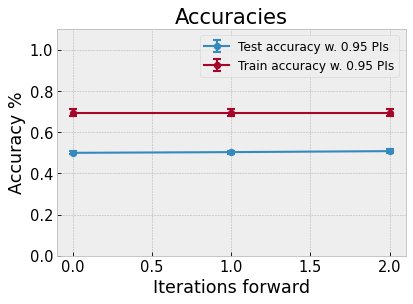

Test accuracies: [0.49952559 0.50301232 0.50779373]
Confusion matrices:


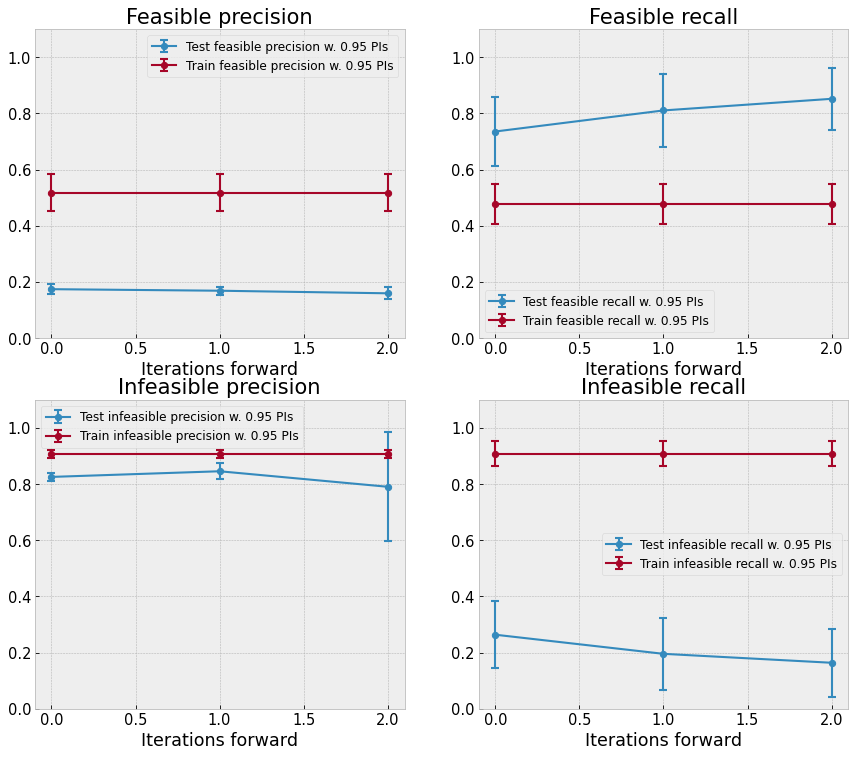

Percentage infeasible on test and train data:


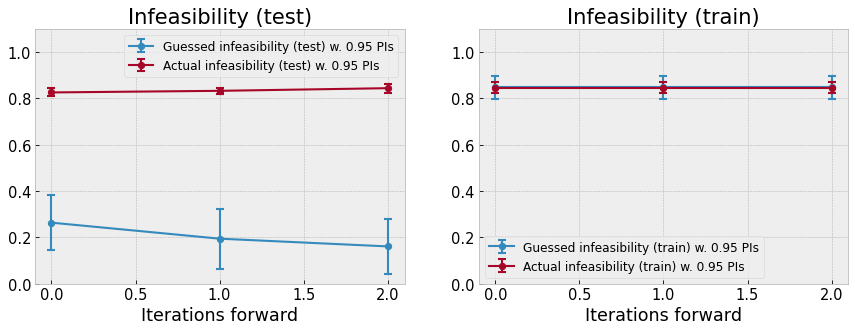

AUC:


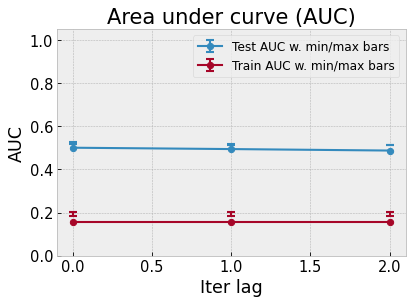

In [ ]:
mt.plot_graphs(AUC = False)

The graphs tell a similar story. Can we improve the model by tuning the parameters?

## Hyperparameter tuning

Hopefully we can improve the performance by tuning the model parameters. We will look at the number of neighbors (k) and the parameter for the minkowski distance (p).

We will thus perform a grid search using 5-fold CV and balanced accuracy as the performance metric.

In [7]:
# Model parameters
sampling = 'over'

# Run the grid search
mt.hyperparameter_tuning(n_train = 8, n_test = 2, n_epochs = 10, sampling = sampling, n_neighbors = [1, 3, 5, 11, 21, 31], algorithm = ['brute'], metric = ['minkowski'], p = [2])

100%|██████████| 6/6 [08:20<00:00, 83.49s/it]


   Ranking    n_neighbors  algorithm    metric       p    balanced_accuracy    Standard deviation
---------  -------------  -----------  ---------  ---  -------------------  --------------------
        1             31  brute        minkowski    2             0.502596            0.0104226
        2             21  brute        minkowski    2             0.501722            0.00873197
        3              5  brute        minkowski    2             0.501147            0.00934859
        4              1  brute        minkowski    2             0.499841            0.00975665
        5              3  brute        minkowski    2             0.499526            0.0108455
        6             11  brute        minkowski    2             0.499193            0.0110135


{'n_neighbors': 31, 'algorithm': 'brute', 'metric': 'minkowski', 'p': 2}

**NOTE**: We didn't try more values for p since that made the algorithm super slow, taking more than an hour to complete a single test.

Let's run the test again with different values for _k_.

In [9]:
# Model parameters
sampling = 'over'

# Run the grid search
mt.hyperparameter_tuning(n_train = 8, n_test = 2, n_epochs = 10, sampling = sampling, n_neighbors = [17, 19, 21, 23, 25, 31], algorithm = ['brute'], metric = ['minkowski'], p = [2])

100%|██████████| 6/6 [08:48<00:00, 88.06s/it]


   Ranking    n_neighbors  algorithm    metric       p    balanced_accuracy    Standard deviation
---------  -------------  -----------  ---------  ---  -------------------  --------------------
        1             31  brute        minkowski    2             0.502596            0.0104226
        2             25  brute        minkowski    2             0.501884            0.0104088
        3             21  brute        minkowski    2             0.501722            0.00873197
        4             23  brute        minkowski    2             0.501428            0.00820269
        5             19  brute        minkowski    2             0.498927            0.0121118
        6             17  brute        minkowski    2             0.498795            0.0130621


{'n_neighbors': 31, 'algorithm': 'brute', 'metric': 'minkowski', 'p': 2}

In [10]:
# let's check the new updated parameters
mt.parameters

{'n_neighbors': 31, 'algorithm': 'brute', 'metric': 'minkowski', 'p': 2}

# Results

In [11]:
# re-train
sampling = 'over' # can be 'under', 'over' or nothing

# run the training loop
mt.training_loop(sampling = sampling)

In [12]:
mt.print_essentials()

Results: 

variable                             average    std  95.0% CI          min    max
---------------------------------  ---------  -----  --------------  -----  -----
weighted accuracy [%]                  50.26   1.04  (49.51, 51.01)  48.35  52.12
duration [s]                            1.11   0.2   (0.96, 1.25)     0.79   1.43
infeasible_percentage [%]              82.56   2.4   (80.85, 84.28)  77.25  85.45
infeasible_guessed_percentage [%]      50.51  36.55  (24.36, 76.66)   7.37  96.29
feasible_recall [%]                    49.94  35.84  (24.3, 75.57)    2.65  92.75
feasible_precision [%]                 17.65   2.85  (15.62, 19.69)  11.84  22.6
infeasible_recall [%]                  50.58  36.7   (24.33, 76.84)   7.4   96.08
infeasible_precision [%]               82.48   2.7   (80.55, 84.41)  76.81  85.85
auc of roc                              0.5    0.01  (0.5, 0.51)      0.48   0.52


Weighted accuracies:


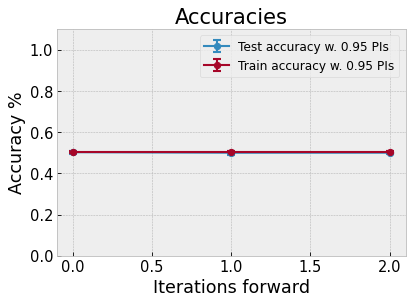

Test accuracies: [0.50259568 0.49999575 0.50016044]
Confusion matrices:


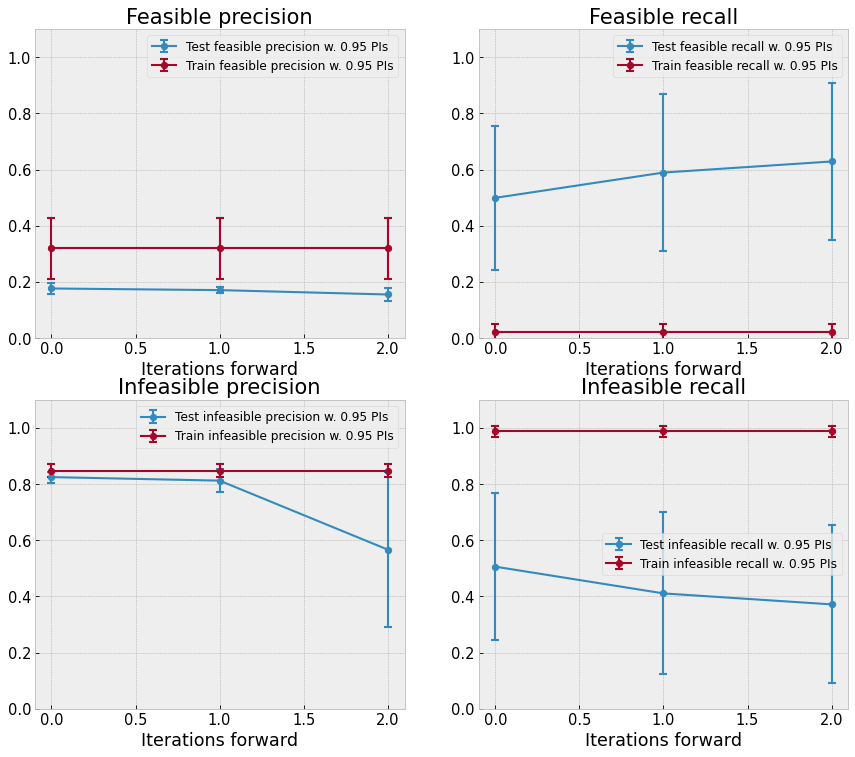

Percentage infeasible on test and train data:


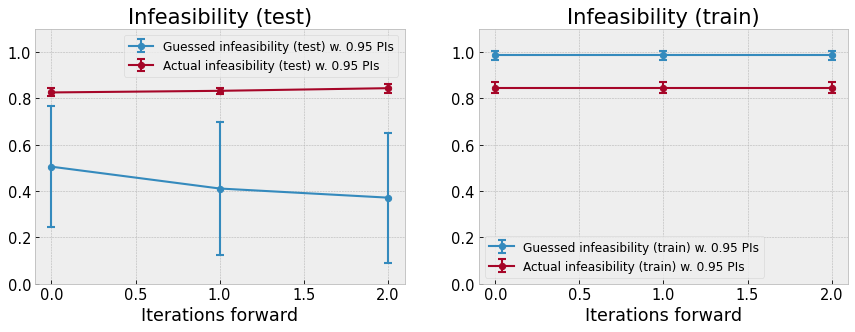

In [13]:
mt.plot_graphs(AUC = False)

# Conclusions

Even after tuning the hyperparemeters, we don't get very good results. A weighted accuracy of just over 50% and an average AUC of 0.5 tells us that the model barely does better than just guessing. 

We also notice that the model doesn't guess feaisble/infeasible in the true proportion of about 20/80, it guesses much more feasible then infeasible. This problem most likely stems from the nature of the model and the data. Since the optimization algorithm that is used to generate the data "moves" in the direction of the optimal region using feasible points, points in a new iteration will be closest to the feasible points in the previous iteration.

We thus conclude that a nearest neighbor classifier **isn't suitable** for this problem.